In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner 
import batman
from scipy.stats import chisquare

Text(0, 0.5, 'Relativni flux')

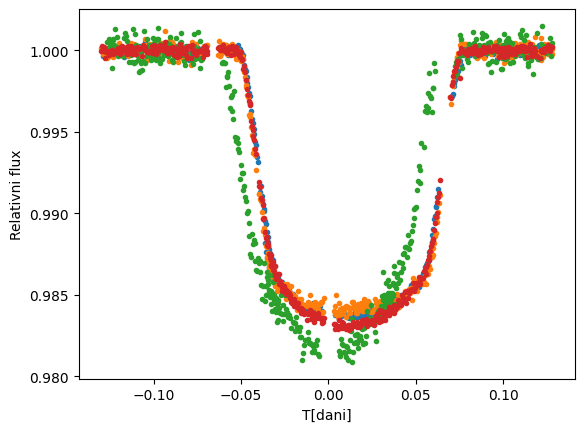

In [2]:
T= np.loadtxt('T320nm.txt')
F=np.loadtxt('F320nm.txt')
Ferr=np.loadtxt('Fe320nm.txt')
T1=np.argsort(T)
T=T[T1]
F=F[T1]

T2= np.loadtxt('T5801nm.txt')
F2=np.loadtxt('F5801nm.txt')
Ferr2=np.loadtxt('Fe580nm.txt')
T3=np.argsort(T2)
T2=T2[T3]
F2=F2[T3]

T4= np.loadtxt('T677nm.txt')
F4=np.loadtxt('F677nm.txt')
Ferr4=np.loadtxt('Fe677nm.txt')
T5=np.argsort(T4)
T4=T4[T5]
F4=F4[T5]

T6= np.loadtxt('T873nm.txt')
F6=np.loadtxt('F873nm.txt')
Ferr6=np.loadtxt('Fe873nm.txt')

T7=np.argsort(T6)
T6=T6[T7]
F6=F6[T7]
Ta=np.array([*T,*T2,*T4,*T6])
Fa=np.array([*F,*F2,*F4,*F6])
Ferra=np.array([*Ferr,*Ferr2,*Ferr4,*Ferr6])

plt.plot(T4,F4,'.')
plt.plot(T6,F6,'.')
plt.plot(T,F,'.')
plt.plot(T2,F2,'.')
plt.xlabel('T[dani]')
plt.ylabel('Relativni flux')

In [3]:
def model1(theta,Ta):
    a,i,u1,u2,u3,u4,u5,u6,u7,u8,t1,t2,t3,t4,r1,r2,r3,r4=theta
    params = batman.TransitParams()       #object to store transit parameters
    params.t0 = t1                      #time of inferior conjunction
    params.per = 3.5                   #orbital period
    params.rp = r1                     #planet radius (in units of stellar radii)
    params.a = a                      #semi-major axis (in units of stellar radii)
    params.inc = i                     #orbital inclination (in degrees)
    params.ecc = 0.                      #eccentricity
    params.w = 48                      #longitude of periastron (in degrees)
    params.limb_dark = "quadratic"        #limb darkening model
    params.u = [u1, u2]      #limb darkening coefficients [u1, u2, u3, u4]
    m = batman.TransitModel(params, Ta)    #initializes model
    flux = m.light_curve(params)
    return flux


In [4]:
def model2(theta,Ta):
    a,i,u1,u2,u3,u4,u5,u6,u7,u8,t1,t2,t3,t4,r1,r2,r3,r4=theta
    params = batman.TransitParams()       #object to store transit parameters
    params.t0 = t2                      #time of inferior conjunction
    params.per = 3.5                   #orbital period
    params.rp = r2                     #planet radius (in units of stellar radii)
    params.a = a                      #semi-major axis (in units of stellar radii)
    params.inc = i                     #orbital inclination (in degrees)
    params.ecc = 0.                      #eccentricity
    params.w = 48     
    #longitude of periastron (in degrees)
    params.limb_dark = "quadratic"        #limb darkening model
    params.u = [u3, u4]      #limb darkening coefficients [u1, u2, u3, u4]
    m = batman.TransitModel(params, Ta)    #initializes model
    flux = m.light_curve(params)
    return flux


In [5]:
def model3(theta,Ta):
    a,i,u1,u2,u3,u4,u5,u6,u7,u8,t1,t2,t3,t4,r1,r2,r3,r4=theta
    params = batman.TransitParams()       #object to store transit parameters
    params.t0 = t3                      #time of inferior conjunction
    params.per = 3.5                   #orbital period
    params.rp = r3                     #planet radius (in units of stellar radii)
    params.a = a                      #semi-major axis (in units of stellar radii)
    params.inc = i                     #orbital inclination (in degrees)
    params.ecc = 0.                      #eccentricity
    params.w = 48     
    #longitude of periastron (in degrees)
    params.limb_dark = "quadratic"        #limb darkening model
    params.u = [u5, u6]      #limb darkening coefficients [u1, u2, u3, u4]
    m = batman.TransitModel(params, Ta)    #initializes model
    flux = m.light_curve(params)
    return flux


In [6]:
def model4(theta,Ta):
    a,i,u1,u2,u3,u4,u5,u6,u7,u8,t1,t2,t3,t4,r1,r2,r3,r4=theta
    params = batman.TransitParams()       #object to store transit parameters
    params.t0 = t4                      #time of inferior conjunction
    params.per = 3.5                   #orbital period
    params.rp = r4                     #planet radius (in units of stellar radii)
    params.a = a                      #semi-major axis (in units of stellar radii)
    params.inc = i                     #orbital inclination (in degrees)
    params.ecc = 0.                      #eccentricity
    params.w = 48     
    #longitude of periastron (in degrees)
    params.limb_dark = "quadratic"        #limb darkening model
    params.u = [u7, u8]      #limb darkening coefficients [u1, u2, u3, u4]
    m = batman.TransitModel(params, Ta)    #initializes model
    flux = m.light_curve(params)
    return flux


In [1]:
'''
    Combined transit model for simultaneous fitting of multiple light curves.

    This function splits the concatenated time array into individual
    segments corresponding to different photometric filters and
    evaluates a separate transit model for each filter.
'''

def model(theta,Ta):
    a,i,u1,u2,u3,u4,u5,u6,u7,u8,t1,t2,t3,t4,r1,r2,r3,r4=theta
    extract1 = Ta[:len(T)]
    extract2 = Ta[len(T):len(T)+len(T2)]
    extract3 = Ta[len(T)+len(T2):len(T)+len(T2)+len(T4)]
    extract4 = Ta[len(T)+len(T2)+len(T4):len(T)+len(T2)+len(T4)+len(T6)]
   
    res1 = model1(theta,extract1)
    res2 = model2(theta,extract2)
    res3 = model3(theta,extract3)
    res4 = model4(theta,extract4)
    
    return np.array([*res1,*res2,*res3,*res4])

IndentationError: unexpected indent (3774153505.py, line 4)

In [9]:
def lnlike(theta, Ta, Fa, Ferra):
        return (-0.7) * np.sum(((Fa - model(theta, Ta))/Ferra) ** 2)
    """
    Gaussian log-likelihood function.
    """
def lnprior(theta):
        a,i,u1,u2,u3,u4,u5,u6,u7,u8,t1,t2,t3,t4,r1,r2,r3,r4=theta
        if 1<a<20 and 80<i<90 and -5<u1<5 and -5<u2<5 and -5<u3<5 and -5<u4<5 and -5<u5<5 and -5<u6<5 and-5<u7<5 and -5<u8<5 and -1<t1<1 and -1<t2<1 and -1<t3<1 and -1<t4<1 and 0<r1<1 and 0<r2<1 and 0<r3<1 and 0<r4<1:
            return 0.0
        return -np.inf
def lnprob(theta,Ta,Fa,Ferra):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, Ta, Fa, Ferra)

In [29]:
data=(Ta,Fa,Ferra)
initial = np.array([8.61,86,1,-0.42,0.43,0.26,0.25,0.54,0.64,0.26,0.,0.,0.,0.,0.12,0.12,0.12,0.12])
ndim=len(initial)
nwalkers=100
# Adding small random offsets for walkers
p0 = [np.array(initial) + 1e-3 * np.random.randn(ndim) for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(
    nwalkers, ndim, lnprob, args=data
)
state=sampler.run_mcmc(p0, 3000, progress=True);
sampler.reset()
sampler.run_mcmc(state,500, progress= True)

100%|██████████| 500/500 [00:21<00:00, 23.12it/s]


State([[ 8.68512105 86.49976015  0.99017727 ...  0.12305793  0.12130932
   0.12174263]
 [ 8.64971738 86.44351066  0.86740012 ...  0.1232002   0.12148583
   0.12195953]
 [ 8.69081676 86.52983037  0.93938552 ...  0.12276276  0.12094433
   0.12160497]
 ...
 [ 8.67358872 86.46588831  0.9916735  ...  0.12322378  0.12150614
   0.12222818]
 [ 8.67857123 86.49327362  0.98870324 ...  0.12308395  0.12116945
   0.12161042]
 [ 8.70504281 86.53233386  1.00645319 ...  0.12298944  0.12124244
   0.12178896]], log_prob=[-2017.85417136 -2026.72137632 -2029.02981284 -2021.79106465
 -2024.75783554 -2022.94096102 -2019.32997494 -2025.67828848
 -2025.719652   -2026.46984067 -2021.81627841 -2022.05350015
 -2019.8384027  -2020.34428356 -2027.98242659 -2029.78539649
 -2022.99628035 -2024.30804527 -2022.82583381 -2021.86248679
 -2020.63481961 -2019.52614254 -2021.88017121 -2017.00145097
 -2020.48425327 -2028.05002792 -2021.88717756 -2023.2332788
 -2024.79808641 -2027.98311548 -2027.2508909  -2024.08923617
 -202

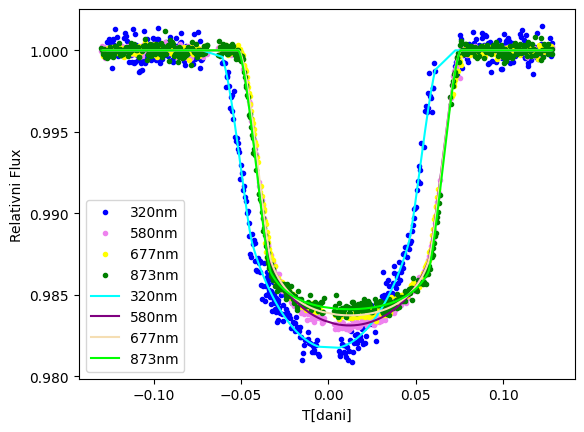

[ 8.68927857e+00  8.65120388e+01  9.64742429e-01 -2.37928783e-01
  5.13682535e-01  4.03826610e-02  1.88747169e-01  4.23061550e-01
  1.61575636e-01  2.59009631e-01  1.17156008e-03  1.21064546e-02
  1.23304398e-02  1.20974489e-02  1.24014342e-01  1.22924814e-01
  1.21197879e-01  1.21742737e-01]


In [30]:
samples = sampler.flatchain
r_pmax  = samples[np.argmax(sampler.flatlnprobability)]
best_fit_model = model(r_pmax,Ta)
plt.plot(T,F,'.', c='blue',label='320nm')
plt.plot(T2,F2,'.',c='violet',label='580nm')
plt.plot(T4,F4,'.',c='yellow',label='677nm')
plt.plot(T6,F6,'.',c='green',label='873nm')

plt.plot(T,best_fit_model[:len(T)],label='320nm',c='cyan')
plt.plot(T2,best_fit_model[len(T):len(T)+len(T2)],c='purple',label='580nm')
plt.plot(T4,best_fit_model[len(T)+len(T2):len(T)+len(T2)+len(T4)],label='677nm',c='wheat')
plt.plot(T6,best_fit_model[len(T)+len(T2)+len(T2):len(T)+len(T2)+len(T4)+len(T6)],label='873nm',c='lime')
plt.legend()

plt.xlabel('T[dani]')
plt.ylabel('Relativni Flux')


plt.show()
print (r_pmax)

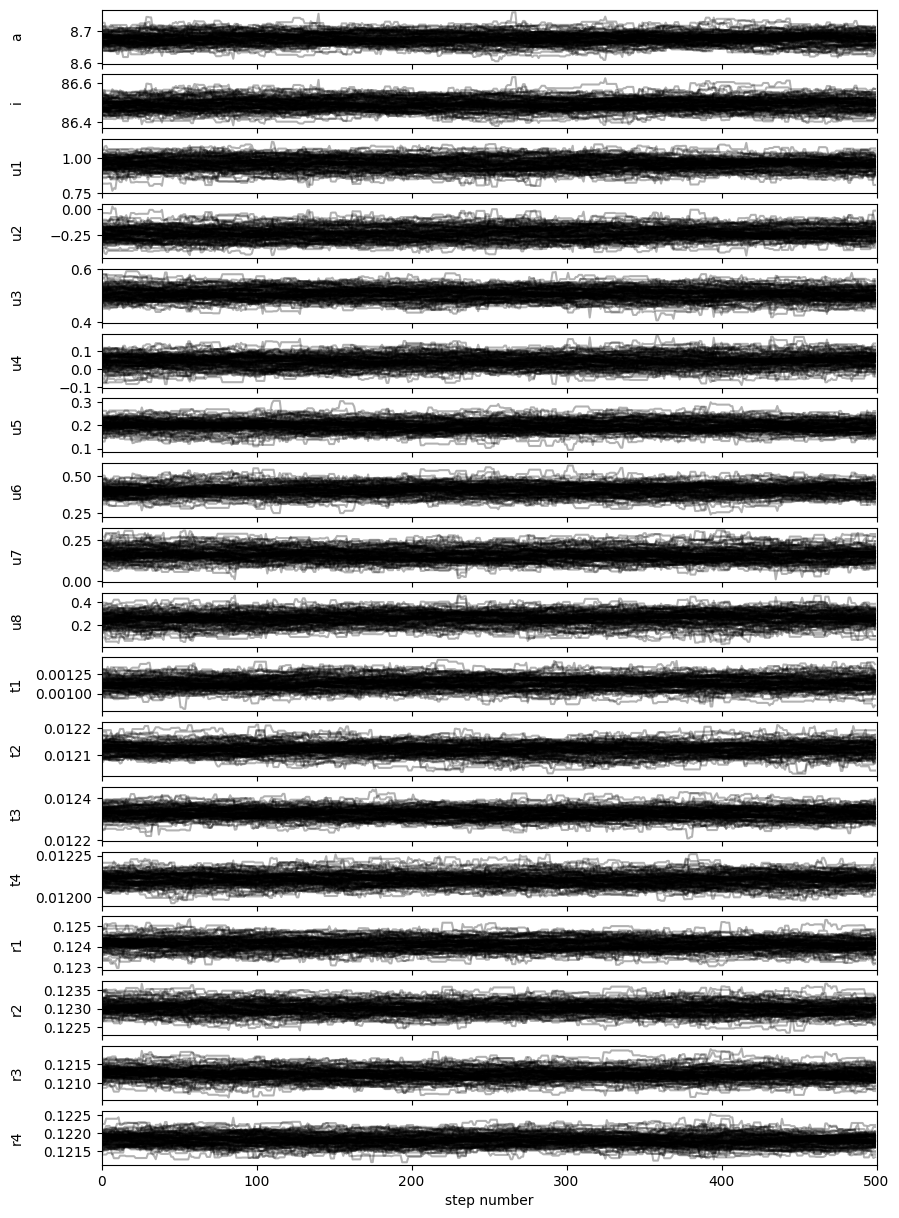

In [31]:
fig, axes = plt.subplots(18, figsize=(10, 15), sharex=True)
samples = sampler.get_chain()
labels = ["a", "i","u1","u2","u3","u4","u5","u6","u7","u8","t1","t2","t3","t4","r1","r2","r3","r4"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

/home/servisi/.pyenv/versions/3.11.7/envs/jupyterhub-main-3.11.7/lib/python3.11/site-packages/arviz/data/base.py:221: UserWarning: More chains (500) than draws (100). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


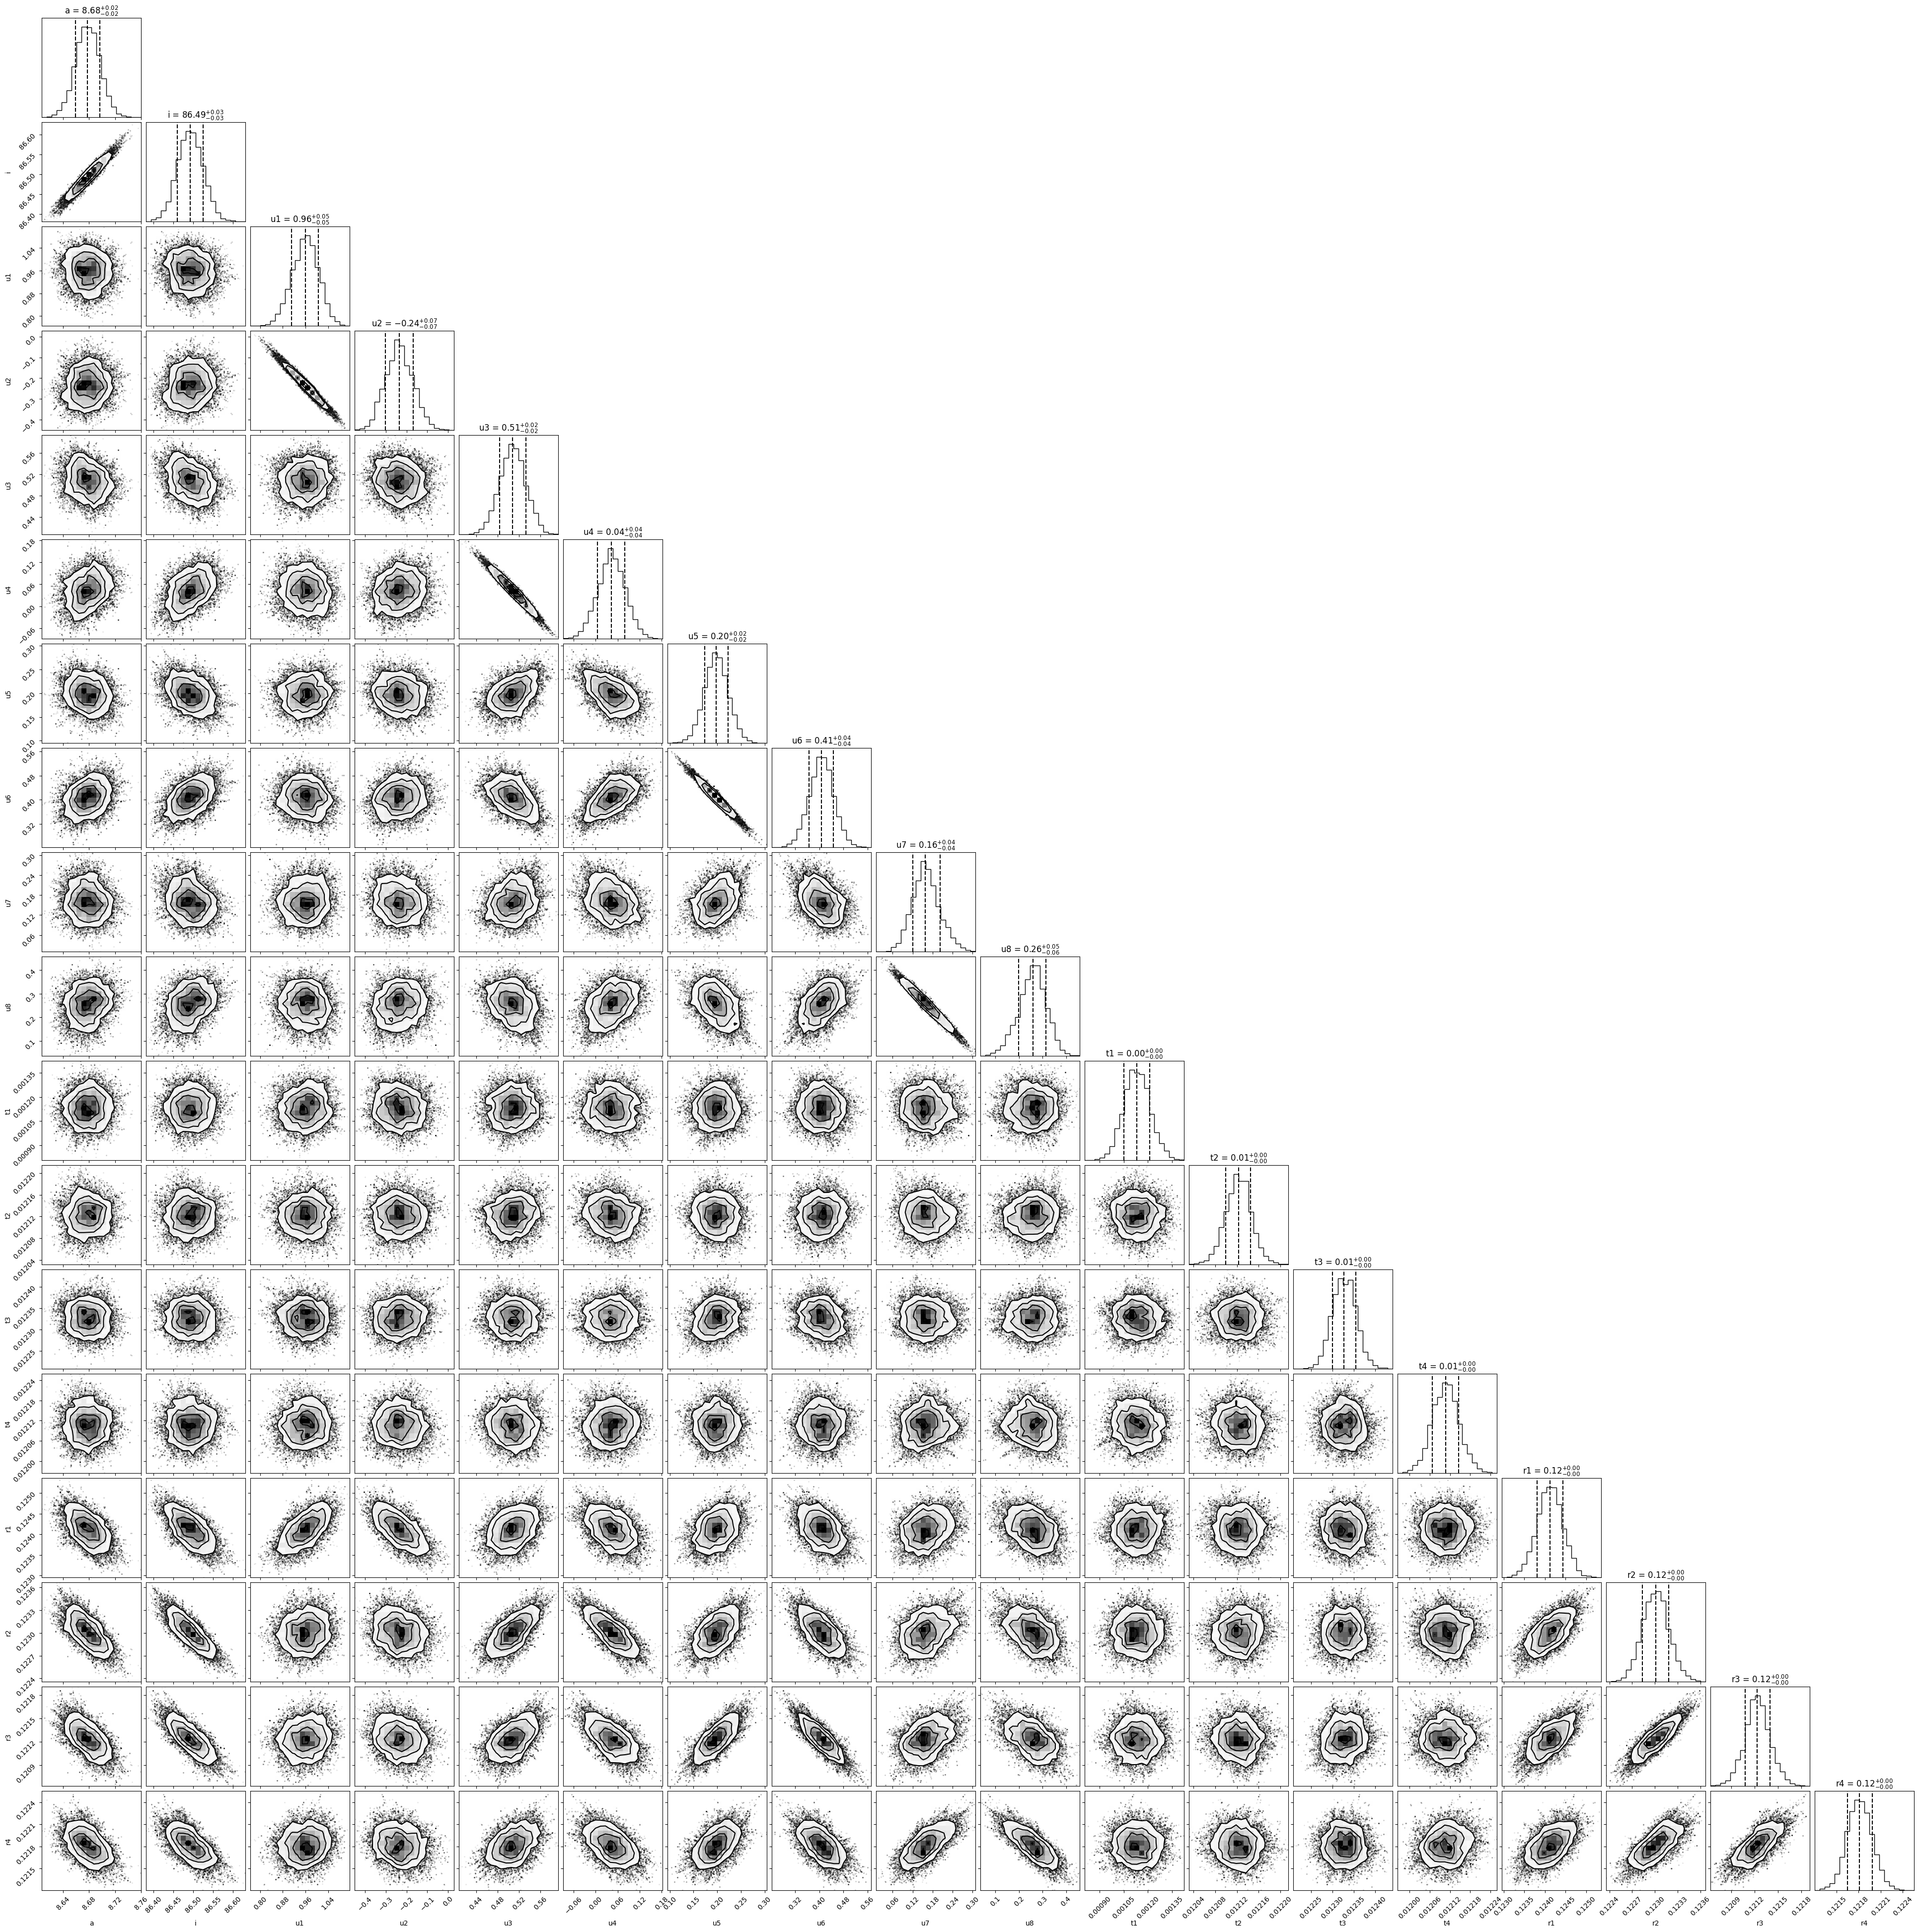

In [32]:
labels=["a", "i","u1","u2","u3","u4","u5","u6","u7","u8","t1","t2","t3","t4","r1","r2","r3","r4"]
fig = corner.corner(samples,show_titles=True,labels=labels,plot_datapoints=True,quantiles=[0.16, 0.5, 0.84])

In [33]:
sampler.get_autocorr_time(tol=0,quiet=False)

array([45.80741775, 44.78645866, 46.15820016, 46.22307249, 45.56862305,
       46.09314307, 43.58264803, 43.15810147, 45.96822775, 44.99453545,
       46.90763843, 44.36441455, 42.30195499, 43.90523685, 46.79538471,
       44.55435552, 42.38649734, 41.80449662])

In [34]:
sampler.acceptance_fraction

array([0.298, 0.27 , 0.292, 0.332, 0.306, 0.298, 0.31 , 0.286, 0.276,
       0.326, 0.33 , 0.288, 0.324, 0.338, 0.308, 0.302, 0.344, 0.302,
       0.326, 0.276, 0.354, 0.28 , 0.33 , 0.314, 0.288, 0.342, 0.34 ,
       0.314, 0.31 , 0.316, 0.328, 0.314, 0.308, 0.286, 0.356, 0.294,
       0.322, 0.32 , 0.324, 0.29 , 0.27 , 0.312, 0.314, 0.322, 0.328,
       0.298, 0.302, 0.312, 0.34 , 0.342, 0.324, 0.296, 0.32 , 0.35 ,
       0.29 , 0.328, 0.286, 0.366, 0.278, 0.332, 0.318, 0.342, 0.258,
       0.316, 0.3  , 0.312, 0.32 , 0.336, 0.298, 0.304, 0.284, 0.312,
       0.282, 0.322, 0.336, 0.31 , 0.344, 0.328, 0.316, 0.302, 0.316,
       0.29 , 0.318, 0.316, 0.302, 0.284, 0.28 , 0.298, 0.316, 0.334,
       0.294, 0.304, 0.302, 0.28 , 0.34 , 0.29 , 0.302, 0.302, 0.3  ,
       0.326])

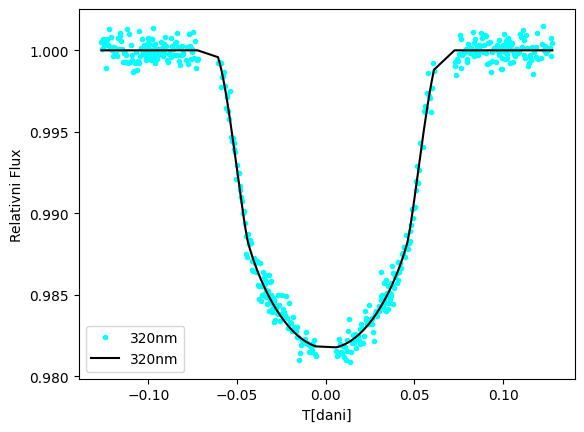

[ 8.67659790e+00  8.64982553e+01  9.39790620e-01 -2.03573459e-01
  4.98719869e-01  6.24548190e-02  1.91338614e-01  4.25176212e-01
  1.42271083e-01  2.90689866e-01  1.12204223e-03  1.21384766e-02
  1.23381188e-02  1.20827115e-02  1.23951500e-01  1.22892254e-01
  1.21166465e-01  1.21737058e-01]


In [20]:
best_fit = model(fitt,Ta)
plt.plot(T,F,'.', c='cyan',label='320nm')


plt.plot(T,best_fit[:len(T)],label='320nm',c='black')

plt.legend()

plt.xlabel('T[dani]')
plt.ylabel('Relativni Flux')


plt.show()
print (r_pmax)

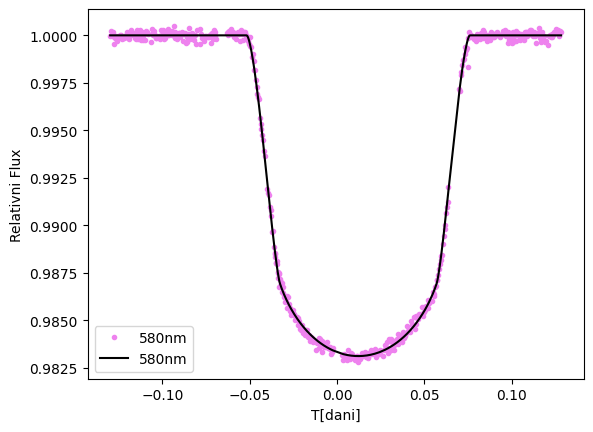

In [21]:
plt.plot(T2,F2,'.',c='violet',label='580nm')


plt.plot(T2,best_fit[len(T):len(T)+len(T2)],c='black',label='580nm')

plt.legend()
plt.xlabel('T[dani]')
plt.ylabel('Relativni Flux')


plt.show()

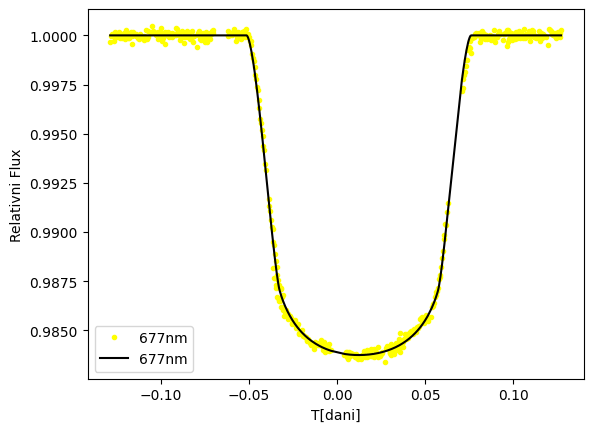

In [22]:
plt.plot(T4,F4,'.',c='yellow',label='677nm')


plt.plot(T4,best_fit[len(T)+len(T2):len(T)+len(T2)+len(T4)],label='677nm',c='black')

plt.legend()
plt.xlabel('T[dani]')
plt.ylabel('Relativni Flux')


plt.show()

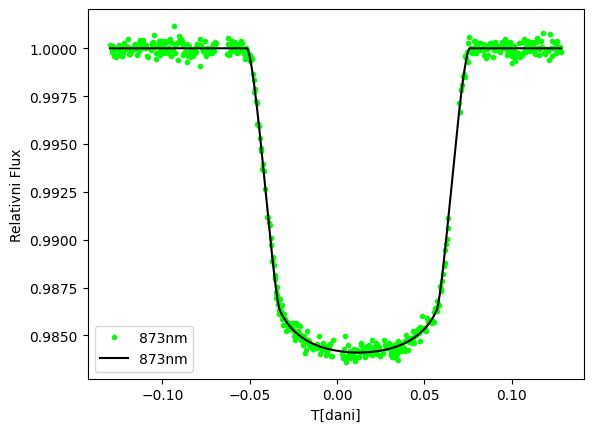

In [23]:
plt.plot(T6,F6,'.',c='lime',label='873nm')

plt.plot(T6,best_fit[len(T)+len(T2)+len(T2):len(T)+len(T2)+len(T4)+len(T6)],label='873nm',c='black')

plt.legend()
plt.xlabel('T[dani]')
plt.ylabel('Relativni Flux')


plt.show()

In [26]:
hi1=np.sum(((F-best_fit[:len(T)])**2)/best_fit[:len(T)])
hi2=np.sum(((F2-best_fit[len(T):len(T)+len(T2)])**2)/best_fit[len(T):len(T)+len(T2)])
hi3=np.sum(((F4-best_fit[len(T)+len(T2):len(T)+len(T2)+len(T4)])**2)/best_fit[len(T)+len(T2):len(T)+len(T2)+len(T4)])
hi4=np.sum(((F6-best_fit[len(T)+len(T2)+len(T2):len(T)+len(T2)+len(T4)+len(T6)])**2)/best_fit[len(T)+len(T2)+len(T2):len(T)+len(T2)+len(T4)+len(T6)])
print(hi1,hi2,hi3,hi4)

0.0001831701067260544 2.106001469063339e-05 3.256878648739013e-05 4.495646335886112e-05


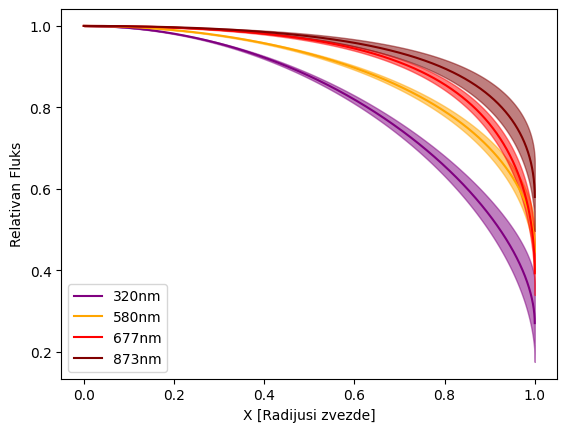

In [29]:
c1=np.mean(u1)
c2=np.mean(u2)
c3=np.mean(u3)
c4=np.mean(u4)
c5=np.mean(u5)
c6=np.mean(u6)
c7=np.mean(u7)
c8=np.mean(u8)

mi=np.linspace(0,1,1000)
x=np.sqrt(1-mi**2)
def func(mi,c1,c2):
    y=1-c1*(1-mi)-c2*(1-mi)**2
    return y

def func1(mi,c3,c4):
    y=1-c3*(1-mi)-c4*(1-mi)**2
    return y

def func2(mi,c5,c6):
    y=1-c5*(1-mi)-c6*(1-mi)**2
    return y

def func3(mi,c7,c8):
    y=1-c7*(1-mi)-c8*(1-mi)**2
    return y


plt.plot(x,func(mi,c1,c2),label='320nm',c='purple')
plt.fill_between(x, func(mi,c1,c2)-dI,func(mi,c1,c2)+dI,alpha=0.5,color='purple')
plt.plot(x,func1(mi,c3,c4),label='580nm',c='orange')
plt.fill_between(x, func1(mi,c3,c4)-dI1,func1(mi,c3,c4)+dI1,alpha=0.5,color='orange')
plt.plot(x,func2(mi,c5,c6),label='677nm',c='r')
plt.fill_between(x, func2(mi,c5,c6)-dI2,func2(mi,c5,c6)+dI2,alpha=0.5,color='r')
plt.plot(x,func3(mi,c7,c8),label='873nm',c='maroon')
plt.fill_between(x,func3(mi,c7,c8)-dI3,func3(mi,c7,c8)+dI3,alpha=0.5,color='maroon')

plt.xlabel('X [Radijusi zvezde]')
plt.ylabel('Relativan Fluks')
plt.legend()
plt.savefig('SimultanoI11.png')